Set up the data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from matplotlib.pyplot import grid
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Admission%20Chance.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


Define targets (y) and features(X)

In [5]:
y=df['Chance of Admit ']
X=df.drop(['Serial No','Chance of Admit '],axis=1)

In [6]:
#detect zeros
print("\n=== Zero Counts (Likely Missings) ===")
zero_counts = (df == 0).sum()
print("Zeros per column:\n", zero_counts)
print("\nZero percentage:\n", (zero_counts / len(df)) * 100)


=== Zero Counts (Likely Missings) ===
Zeros per column:
 Serial No              0
GRE Score              0
TOEFL Score            0
University Rating      0
 SOP                   0
LOR                    0
CGPA                   0
Research             181
Chance of Admit        0
dtype: int64

Zero percentage:
 Serial No             0.00
GRE Score             0.00
TOEFL Score           0.00
University Rating     0.00
 SOP                  0.00
LOR                   0.00
CGPA                  0.00
Research             45.25
Chance of Admit       0.00
dtype: float64


Remove the column with missing value which is Research column

In [7]:
dfC = df.dropna(axis=1)

Train test split

In [8]:
X_train, X_test , y_train , y_test = train_test_split(X,y,train_size=.5,random_state=55) 

In [9]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape



((200, 7), (200, 7), (200,), (200,))

In [10]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_train)}')

train samples: 200
validation samples: 200


Selecting the linear regression model

In [11]:
md = LinearRegression()
#train or fit model
md.fit(X_train,y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:

#predict model
ypred = md.predict(X_test)

In [13]:
ypred

array([0.75207992, 0.77617951, 0.8163821 , 0.84549858, 0.70255614,
       0.6287245 , 0.69102379, 0.62254949, 0.5053653 , 0.77474418,
       0.8037244 , 0.68587939, 0.70531311, 0.50125888, 0.63093822,
       0.6499849 , 0.61587485, 0.71691199, 0.82691543, 0.54155794,
       0.48570279, 0.63062531, 0.92976209, 0.70947255, 0.67338346,
       0.67343717, 0.64498741, 0.88246529, 0.85618787, 0.97785979,
       0.71066901, 0.63621364, 0.89532482, 0.80761068, 0.74636569,
       0.9257328 , 0.48295237, 0.56896144, 0.64063621, 0.89924598,
       0.55897818, 0.78066232, 0.84877329, 0.71351777, 0.82940286,
       0.64878094, 0.9516055 , 0.63088241, 0.94096853, 0.51076565,
       0.7125894 , 0.73489579, 0.49519968, 0.93764336, 0.77949162,
       0.58099079, 0.74857683, 0.66016299, 0.74055395, 0.64807066,
       0.77624586, 0.7428183 , 0.9290982 , 0.80992305, 0.64579512,
       0.73424407, 0.61723583, 0.85467077, 0.91260105, 0.53601577,
       0.63555412, 0.68951274, 0.92589031, 0.53458146, 0.91642

Selecting model(Decision tree)

In [14]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5,random_state=55)
dtr.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,55
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Evalute model of training sample

In [15]:
dtr.score(X_train,y_train)

0.8782024305540737

Cross validate model

In [16]:
cross_validate(dtr,X_train, y_train, cv=5)

{'fit_time': array([0.00187325, 0.00168252, 0.00127912, 0.00118279, 0.0011363 ]),
 'score_time': array([0.00102758, 0.00089788, 0.00070858, 0.00071549, 0.00064993]),
 'test_score': array([0.52051242, 0.61846711, 0.62005447, 0.53673398, 0.7677208 ])}

evaluate model on test sample

In [17]:
dtr.score(X_test,y_test)

0.6853970724185595

In [18]:
cross_validate(dtr, X_test, y_test, cv=5)

{'fit_time': array([0.00201845, 0.00204062, 0.00138879, 0.00120401, 0.0013597 ]),
 'score_time': array([0.00146866, 0.00108671, 0.00074816, 0.00069976, 0.00124907]),
 'test_score': array([0.51916858, 0.75804161, 0.45898795, 0.65429833, 0.62277885])}

In [19]:
# model hyperparameters
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 55,
 'splitter': 'best'}

In [20]:
param_grid = {'md__max_depth': [2,3,4,5,6,7,8,9] ,'md__criterion' : ['squared_error', 'absolute_error'],
        'md__random_state' : [55]
}

pipe = Pipeline([('md',dtr)])
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring ='recall')


In [21]:
grid_search.fit(X_train,y_train)

C:\Users\KIIT\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\KIIT\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\KIIT\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KIIT\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^

,estimator,Pipeline(step...m_state=55))])
,param_grid,"{'md__criterion': ['squared_error', 'absolute_error'], 'md__max_depth': [2, 3, ...], 'md__random_state': [55]}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [22]:
best=grid_search.best_estimator_
best.fit(X_train,y_train)

,steps,"[('md', ...)]"
,transform_input,None
,memory,None
,verbose,False
,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None


In [23]:
ypred=best.predict(X_test)

plot tree

[Text(0.5, 0.875, 'CGPA <= 8.705\nsquared_error = 0.02\nsamples = 200\nvalue = 0.728'),
 Text(0.25, 0.625, 'CGPA <= 7.885\nsquared_error = 0.011\nsamples = 108\nvalue = 0.631'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'TOEFL Score <= 100.5\nsquared_error = 0.009\nsamples = 20\nvalue = 0.504'),
 Text(0.0625, 0.125, 'squared_error = 0.004\nsamples = 12\nvalue = 0.468'),
 Text(0.1875, 0.125, 'squared_error = 0.013\nsamples = 8\nvalue = 0.556'),
 Text(0.375, 0.375, 'CGPA <= 8.21\nsquared_error = 0.007\nsamples = 88\nvalue = 0.66'),
 Text(0.3125, 0.125, 'squared_error = 0.004\nsamples = 31\nvalue = 0.621'),
 Text(0.4375, 0.125, 'squared_error = 0.007\nsamples = 57\nvalue = 0.681'),
 Text(0.75, 0.625, 'CGPA <= 9.155\nsquared_error = 0.007\nsamples = 92\nvalue = 0.843'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'CGPA <= 8.94\nsquared_error = 0.004\nsamples = 55\nvalue = 0.792'),
 Text(0.5625, 0.125, 'squared_error = 0.005\nsamples = 22\nvalue = 0.75'),
 Text(0.6875, 0.125,

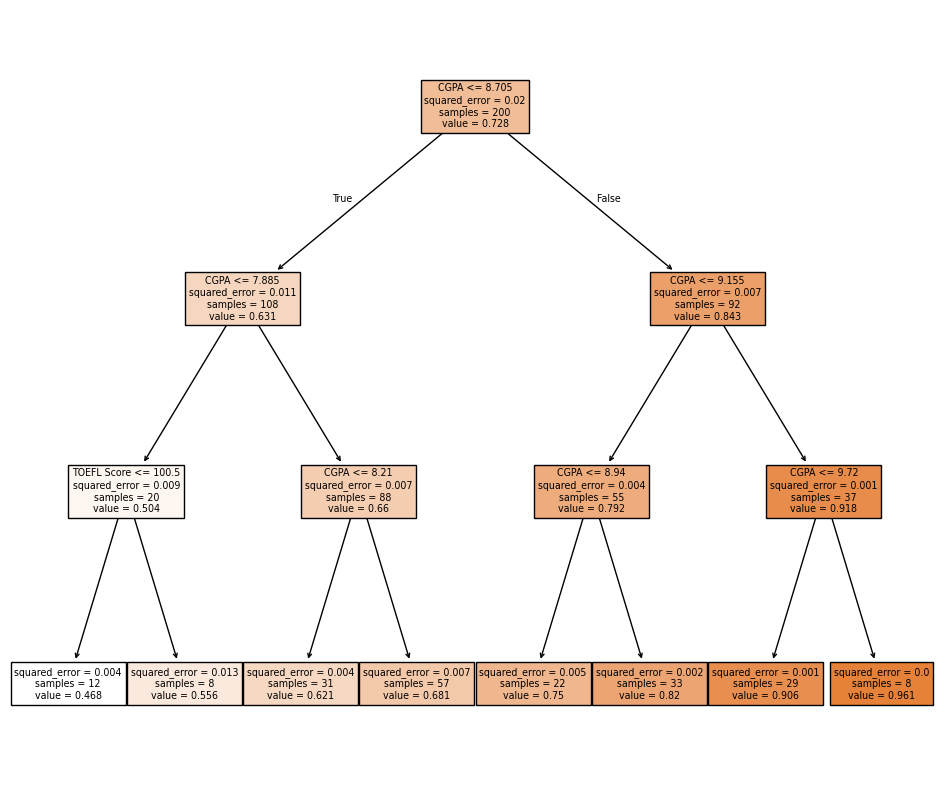

In [27]:
fig,ax=plt.subplots(figsize=(12,10))
final=DecisionTreeRegressor(max_depth=3,random_state=55)
final.fit(X_train,y_train)
plot_tree(decision_tree=final,feature_names=X.columns,filled=True)